In [2]:
#1.a.Să se stabilească
import pandas as pd
import csv
from google.colab import files
import re
from math import log, sqrt

#upload =files.upload()
#ignoram prima linie care e folosita ca antet
data_headers = pd.read_csv("surveyDataSience.csv", nrows=1)
data = pd.read_csv("surveyDataSience.csv", skiprows=2)
data.columns=data_headers.columns

#a)numarul de respondenti (de la care s-au colectate informatiile)
print()
numberOfSurveys = data.shape[0]
print("Numarul de respondenti de la care s-au colectat datele: ", numberOfSurveys, "\n")


#b)numar si tipul informatiilor (atributelor, proprietatilor) detinute pentru un respondent
numberOfAtributes = data.shape[1]
print("Numarul de atribute: ", numberOfAtributes)
print("Tipurile de date ale fiecărei coloane sunt:: \n", data.iloc[2].apply(type))
print("\n")


#c)numarul de respondenti pentru care se detin date complete
data.columns = data.columns.str.strip() #elimin spatiile din titluri
multi_answer_groups = {} # gasesc grupurile de intrebari cu raspunsuri multiple (Qx_Part_y)
for col in data.columns:
    match = re.match(r"(Q\d+)_", col)  # Căutăm formatul Qx_Part_y
    if match:
        group = match.group(1)  # Extragem prefixul Qx
        if group not in multi_answer_groups:
            multi_answer_groups[group] = []
        multi_answer_groups[group].append(col)

multi_answer_cols = set(col for cols in multi_answer_groups.values() for col in cols)

    #identific intrebarile cu un singur raspuns
other_cols = [col for col in data.columns if col not in multi_answer_cols]

valid_response = data[other_cols].notna().all(axis=1)

for cols in multi_answer_groups.values():
    valid_response &= data[cols].notna().any(axis=1)  # Verificăm dacă cel puțin un răspuns a fost oferit în întrebările multiple

numberOfValidResponses = valid_response.sum()
print(f"Numarul de respondenti pentru care se detin date complete: {numberOfValidResponses}\n")

#d)durata medie a anilor de studii superioare pentru acesti respondenti (cea efectiva sau cea estimata), durata
#medie a anilor de studii pentru respondentii din Romania si durata medie a anilor de studii pentru respondentii
#din Romania care sunt femei. Comparati rezultatele obtinute pentru cele trei grupuri de respondenti. Se
#presupune ca studiile de licenta dureaza 3 ani, cele de master 2 ani si cele de doctorat 3 ani.

licenta = 3
master = 2
doctorat = 3
suma=0

for x in data["Q4"]:
        if x == "Bachelor’s degree":
            suma += licenta
        else:
            if x == "Master’s degree":
                suma+=master
            else:
                if x == "Doctoral degree":
                    suma+=doctorat

DurataMedie = suma/numberOfSurveys
print("Durata medie a anilor de studii superioare: ", DurataMedie)

#durata medie a persoanelor din Romania
data_in_Romania = data[data["Q3"] == "Romania"]

numberOfPersonsFromRo = data_in_Romania.shape[0]

sumaRo = 0

for x in data_in_Romania["Q4"]:
        if x == "Bachelor’s degree":
            sumaRo += licenta
        else:
            if x == "Master’s degree":
                sumaRo+=master
            else:
                if x == "Doctoral degree":
                    sumaRo+=doctorat

DurataMedieRo = sumaRo/numberOfPersonsFromRo
print("Durata medie a anilor de studii superioare in Romania: ", DurataMedieRo)

# durata medie in Romania femei
data_in_ro_woman = data_in_Romania[data_in_Romania["Q2"] == "Woman"]
numberOfPersonsFromRoWOman = data_in_ro_woman.shape[0]
sumaRoWoman = 0
for x in data_in_ro_woman["Q4"]:
        if x == "Bachelor’s degree":
            sumaRoWoman += licenta
        else:
            if x == "Master’s degree":
                sumaRoWoman+=master
            else:
                if x == "Doctoral degree":
                    sumaRoWoman+=doctorat
DurataMedieRoWoman = sumaRoWoman/numberOfPersonsFromRoWOman
print("Durata medie a anilor de studii superioare in Romania la femei: ", DurataMedieRoWoman)

if DurataMedieRo > DurataMedie:
    print(f"Durata medie a anilor de studii in Romania este mai mare decat media globala: {DurataMedieRo} vs {DurataMedie}")
else:
    print(f"Durata medie a anilor de studii in Romania este mai mica decat media globala: {DurataMedieRo} vs {DurataMedie}")

if DurataMedieRoWoman > DurataMedieRo:
    print(f"Femeile din Romania au o durata medie a studiilor mai mare decat media generala din Romania: {DurataMedieRoWoman} vs {DurataMedieRo}")
else:
    print(f"Femeile din Romania au o durata medie a studiilor mai mica decat media generala din Romania: {DurataMedieRoWoman} vs {DurataMedieRo}")
#e)numarul de respondenti femei din Romania pentru care se detin date complete
print()
numberOfRWithCompleteDataFromRoWoman = data_in_ro_woman.dropna().shape[0]
print("Numarul de respondenti femei din Romania pentru care se detin date complete: ", str(numberOfRWithCompleteDataFromRoWoman))


#f)numarul de femei din Romania care programeaza in Python, precum si intervalul de varsta cu cele mai multe femei care programeaza in Python?
#Dar in C++? Comparati rezultatele obtinute pentru cele doua limbaje de programare.

print()
dataWomenRomaniaPython = data_in_ro_woman[data_in_ro_woman["Q7_Part_1"] == "Python"]
numberOfWomenRomaniaPython = dataWomenRomaniaPython.shape[0]
frecventa_python = {}
for x in dataWomenRomaniaPython["Q1"]:
  if x in frecventa_python:
    frecventa_python[x] +=1
  else:
     frecventa_python[x] = 1
interval_python = max(frecventa_python, key=frecventa_python.get)
print("Numarul de femei din Romania care utilizeaza Python: ", numberOfWomenRomaniaPython, "\nIntervalul de varsta cu cele mai multe femei: ", interval_python)

dataWomenRomaniaCpp = data_in_ro_woman[data_in_ro_woman["Q7_Part_5"] == "C++"]
numberOfWomenRomaniaCpp = dataWomenRomaniaCpp.shape[0]
frecventa_cpp = {}
for x in dataWomenRomaniaCpp["Q1"]:
  if x in frecventa_cpp:
    frecventa_cpp[x] +=1
  else:
     frecventa_cpp[x] = 1
interval_cpp = max(frecventa_cpp, key=frecventa_cpp.get)
print("Numarul de femei din Romania care utilizeaza C++: ", numberOfWomenRomaniaCpp, "\nIntervalul de varsta cu cele mai multe femei: ", interval_cpp)

if numberOfWomenRomaniaPython == numberOfWomenRomaniaCpp:
  print("Numarul femeilor din Romania care folosesc Python si C++ este egal.")
elif numberOfWomenRomaniaPython > numberOfWomenRomaniaCpp:
   print("Numarul de femei din Romania care folosesc Python este mai mare decat numarul celor care folosesc C++.")
else:
    print("Numarul femeilor din Romania care folosesc C++ este mai mare decat numarul celor care folosesc Python.")

print()
if frecventa_python[interval_python] == frecventa_cpp[interval_cpp] and interval_cpp==interval_python:
  print("Intervalul de varsta cel mai frecvent pentru femeile din Romania este: ", interval_python)
elif frecventa_python[interval_python] == frecventa_cpp[interval_cpp]:
  print("Intervalele de varsta ", interval_cpp, " si ", interval_python, " sunt la fel de frecvente pentru femeile din Romania.")
elif frecventa_python[interval_python] > frecventa_cpp[interval_cpp]:
   print("Intervalul de varsta cel mai frecvent pentru femeile din Romania este: ", interval_python)
else:
    print("Intervalul de varsta cel mai frecvent pentru femeile din Romania este: ", interval_cpp)

<ipython-input-2-be564d56b4ef>:11: DtypeWarning: Columns (195,201) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("surveyDataSience.csv", skiprows=2)



Numarul de respondenti de la care s-au colectat datele:  25972 

Numarul de atribute:  369
Tipurile de date ale fiecărei coloane sunt:: 
 Time from Start to Finish (seconds)      <class 'numpy.int64'>
Q1                                               <class 'str'>
Q2                                               <class 'str'>
Q3                                               <class 'str'>
Q4                                               <class 'str'>
                                                ...           
Q38_B_Part_8                                   <class 'float'>
Q38_B_Part_9                                   <class 'float'>
Q38_B_Part_10                                  <class 'float'>
Q38_B_Part_11                          <class 'numpy.float64'>
Q38_B_OTHER                                    <class 'float'>
Name: 2, Length: 369, dtype: object


Numarul de respondenti pentru care se detin date complete: 201

Durata medie a anilor de studii superioare:  2.2473047897736023
Du

In [ ]:
#g)domeniul de valori posibile si valorile extreme pentru fiecare
#atribut/proprietate (feature). In cazul proprietatilor nenumerice, cate valori
#posibile are fiecare astfel de proprietate

print()
for col in data.columns: #Parcurg fiecare coloana
  print("Afisare atributul: ", col)
  if pd.api.types.is_numeric_dtype(data[col]): # Daca coloana este numerica
    min_val = data[col].min()
    max_val = data[col].max()
    # Verific dacă există valori nenule pentru acest atribut
    if not pd.isna(min_val):
      print(f"Domeniu de valori posibile: [{min_val},{max_val}]; Valori extreme: {min_val}(valoare minima), {max_val}(valoare maxima)")
    else:
      print(f"Domeniu de valori posibile: {min_val}")
  else:
    # Dacă atributul este de tip text/categorial (nenumeric)
      number_unique = data[col].nunique()
      print(f"Numar valori distincte: {number_unique}")


Afisare atributul:  Time from Start to Finish (seconds)
Domeniu de valori posibile: [120,2488653]; Valori extreme: 120(valoare minima), 2488653(valoare maxima)
Afisare atributul:  Q1
Numar valori distincte: 11
Afisare atributul:  Q2
Numar valori distincte: 5
Afisare atributul:  Q3
Numar valori distincte: 66
Afisare atributul:  Q4
Numar valori distincte: 7
Afisare atributul:  Q5
Numar valori distincte: 15
Afisare atributul:  Q6
Numar valori distincte: 7
Afisare atributul:  Q7_Part_1
Numar valori distincte: 1
Afisare atributul:  Q7_Part_2
Numar valori distincte: 1
Afisare atributul:  Q7_Part_3
Numar valori distincte: 1
Afisare atributul:  Q7_Part_4
Numar valori distincte: 1
Afisare atributul:  Q7_Part_5
Numar valori distincte: 1
Afisare atributul:  Q7_Part_6
Numar valori distincte: 1
Afisare atributul:  Q7_Part_7
Numar valori distincte: 1
Afisare atributul:  Q7_Part_8
Numar valori distincte: 1
Afisare atributul:  Q7_Part_9
Numar valori distincte: 1
Afisare atributul:  Q7_Part_10
Numar v

In [ ]:
#h)transformati informatiile despre vechimea in programare in numar de ani (folositi in locul intervalului,
#mijlocul acestuia) si apoi calculati momentele de ordin 1 si 2 pentru aceasta variabila (minim, maxim, media,
#deviatia standard, mediana). Ce se poate spune despre aceasta variabila?

interval_to_years = {
    "I have never written code" : 0,
    "< 1 years": 0.5,
    "1-3 years": 2,
    "3-5 years": 4,
    "5-10 years": 7.5,
    "10-20 years": 15,
    "20+ years": 25
}

# Crearea unei noi coloane "YearsCoding", unde se mapază intervalele de experiență la valori numerice
data["YearsCoding"] = data["Q6"].map(interval_to_years)

print("Valori neconvertite:", data["YearsCoding"].isna().sum())

# Calcularea momentelor statistice pentru această variabilă
min_years = data["YearsCoding"].min()
max_years = data["YearsCoding"].max()
mean_years = data["YearsCoding"].mean()
median_years = data["YearsCoding"].median()
std_years = data["YearsCoding"].std()

print(f"Minim: {min_years} ani")
print(f"Maxim: {max_years} ani")
print(f"Media: {mean_years:.2f} ani")
print(f"Mediana: {median_years} ani")
print(f"Deviația standard: {std_years:.2f} ani")

# Interpretarea deviației standard
if std_years > mean_years / 2:
    print("Distribuția este dispersată, există variații mari între respondenți.")
else:
    print("Distribuția este relativ concentrată în jurul mediei.")

# Interpretarea formei distribuției
if mean_years > median_years:
    print("Distribuția este asimetrică spre dreapta (mai mulți respondenți au experiență mică).")
elif mean_years < median_years:
    print("Distribuția este asimetrică spre stânga (mai mulți respondenți cu experiență mare).")
else:
    print("Distribuția este simetrică.")

Valori neconvertite: 0
Minim: 0.0 ani
Maxim: 25.0 ani
Media: 5.28 ani
Mediana: 2.0 ani
Deviația standard: 6.79 ani
Distribuția este dispersată, există variații mari între respondenți.
Distribuția este asimetrică spre dreapta (mai mulți respondenți au experiență mică).


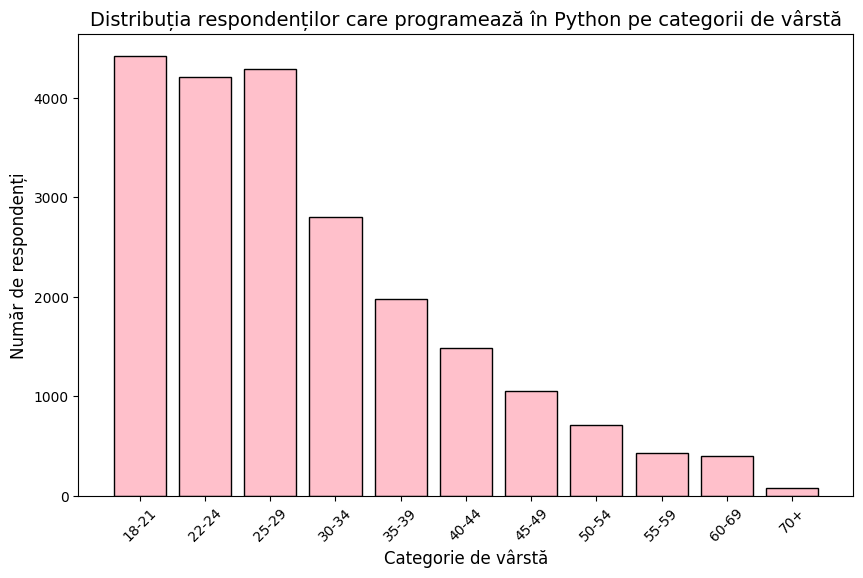

In [ ]:
#1.b.Sa se vizualizeze
import matplotlib.pyplot as plt

#a)distributia respondentilor care programeaza in Python pe categorii de varsta

# Se identifică toate coloanele care conțin informații despre limbajele de programare folosite de respondenți
coloane_q7 = [col for col in data.columns if col.startswith("Q7_Part")]
#filtrare dup Python si vf fiecare rand din coloane si se patreaza doar cele cu Python
python_users = data[data[coloane_q7].apply(lambda x: x.str.contains("Python", na=False).any(), axis=1)]

#calculez distributia pe categ. de varsta
age_distribution = python_users["Q1"].value_counts().sort_index()
plt.figure(figsize=(10, 6))
plt.bar(age_distribution.index, age_distribution.values, color="pink", edgecolor="black")

plt.title("Distribuția respondenților care programează în Python pe categorii de vârstă", fontsize=14)
plt.xlabel("Categorie de vârstă", fontsize=12)
plt.ylabel("Număr de respondenți", fontsize=12)
plt.xticks(rotation=45)  # Rotim etichetele pentru a fi putin de citit

# Afișăm graficul
plt.show()

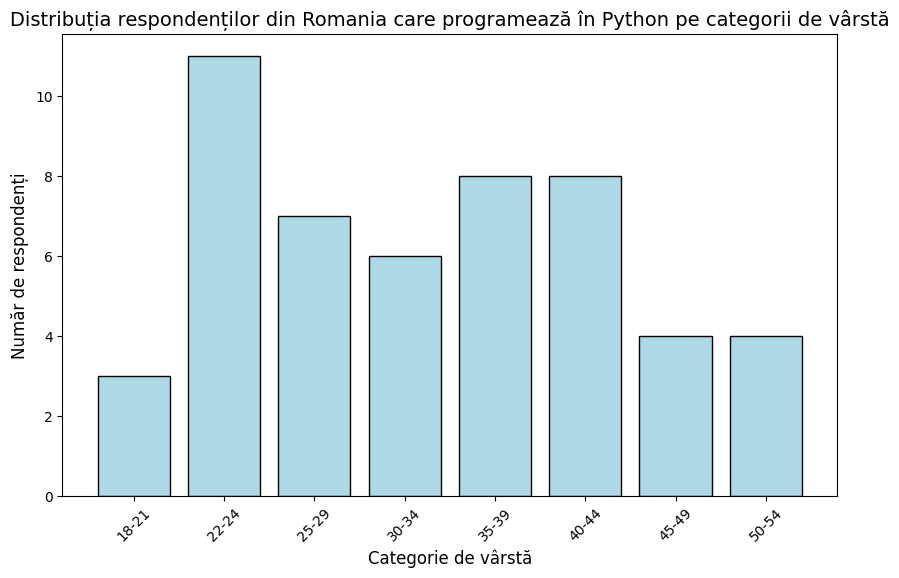

In [ ]:
#b)distributia respondentilor din Romania care programeaza in Python pe categorii de varsta

data_in_Romania = data[data["Q3"] == "Romania"]
coloane_q7 = [col for col in data.columns if col.startswith("Q7_Part")]
python_users_ro = data_in_Romania[data_in_Romania[coloane_q7].apply(lambda x: x.str.contains("Python", na=False).any(), axis=1)]

age_distribution = python_users_ro["Q1"].value_counts().sort_index()
plt.figure(figsize=(10, 6))
plt.bar(age_distribution.index, age_distribution.values, color="lightblue", edgecolor="black")

plt.title("Distribuția respondenților din Romania care programează în Python pe categorii de vârstă", fontsize=14)
plt.xlabel("Categorie de vârstă", fontsize=12)
plt.ylabel("Număr de respondenți", fontsize=12)
plt.xticks(rotation=45)   # Rotim etichetele pentru a fi putin de citit

# Afișăm graficul
plt.show()

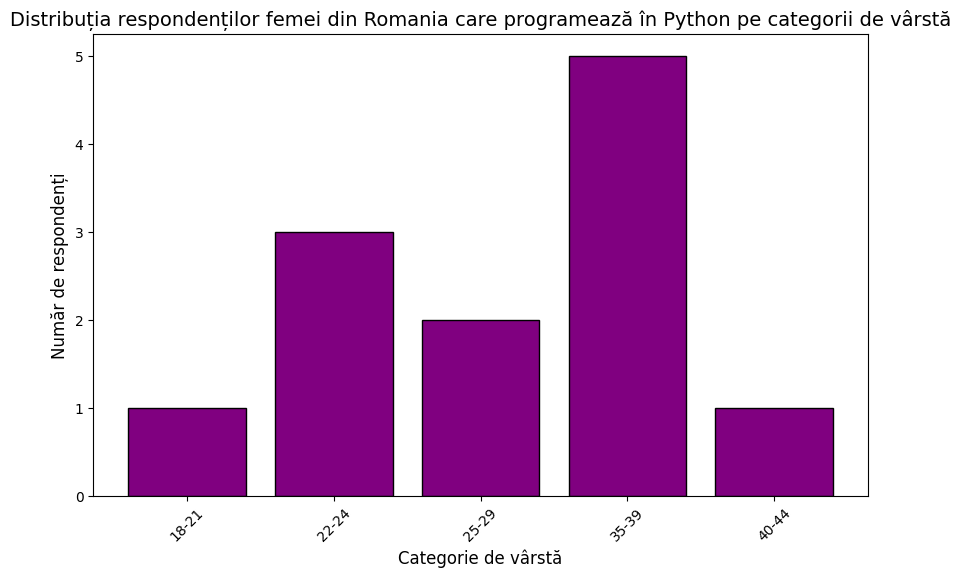

In [ ]:
#c)distributia respondentilor femei din Romania care programeaza in Python pe categorii de varsta

data_in_Romania_femei = data[(data["Q3"] == "Romania") & (data["Q2"] == "Woman")]
coloane_q7 = [col for col in data.columns if col.startswith("Q7_Part")]
python_users_ro_wom = data_in_Romania_femei[data_in_Romania_femei[coloane_q7].apply(lambda x: x.str.contains("Python", na=False).any(), axis=1)]

age_distribution = python_users_ro_wom["Q1"].value_counts().sort_index()
plt.figure(figsize=(10, 6))
plt.bar(age_distribution.index, age_distribution.values, color="purple", edgecolor="black")

plt.title("Distribuția respondenților femei din Romania care programează în Python pe categorii de vârstă", fontsize=14)
plt.xlabel("Categorie de vârstă", fontsize=12)
plt.ylabel("Număr de respondenți", fontsize=12)
plt.xticks(rotation=45)   # Rotim etichetele pentru a fi putin de citit

# Afișăm graficul
plt.show()

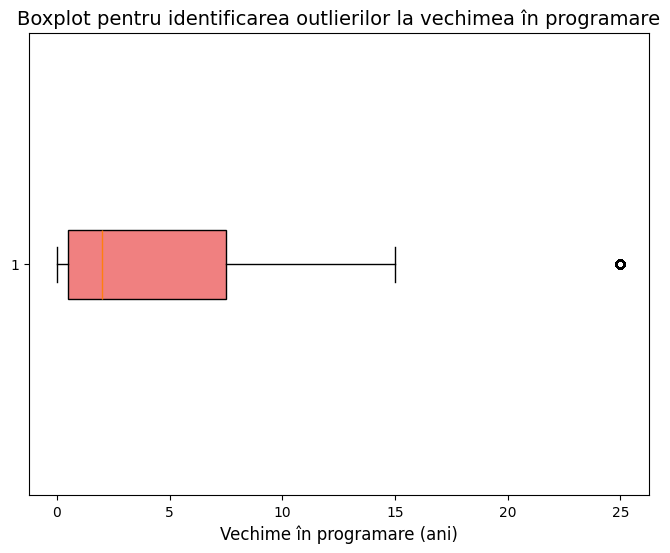

Outliers din punct de vedere al vechimii în programare:
              Q6  YearsCoding
0      20+ years         25.0
2      20+ years         25.0
15     20+ years         25.0
22     20+ years         25.0
68     20+ years         25.0
...          ...          ...
25861  20+ years         25.0
25886  20+ years         25.0
25909  20+ years         25.0
25923  20+ years         25.0
25962  20+ years         25.0

[1860 rows x 2 columns]


In [ ]:
#d)respondentii care pot fi considerati "outlieri" din punct de vedere al vechimii in programare (puteti folositi un boxplot pentru a identifica aceste valori)

data["YearsCoding"] = data["Q6"].map({
    "I have never written code" : 0,
    "< 1 years": 0.5,
    "1-3 years": 2,
    "3-5 years": 4,
    "5-10 years": 7.5,
    "10-20 years": 15,
    "20+ years": 25
})

Q1 = data["YearsCoding"].quantile(0.25)
Q3 = data["YearsCoding"].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

outliers = data[(data["YearsCoding"] < lower_limit) | (data["YearsCoding"] > upper_limit)]

plt.figure(figsize=(8, 6))
#identificarea vizuală a valorilor extreme.
plt.boxplot(data["YearsCoding"], vert=False, patch_artist=True, boxprops=dict(facecolor='lightcoral'))

plt.title("Boxplot pentru identificarea outlierilor la vechimea în programare", fontsize=14)
plt.xlabel("Vechime în programare (ani)", fontsize=12)

# Afișăm graficul
plt.show()

# Afișăm outlierii
print("Outliers din punct de vedere al vechimii în programare:")
print(outliers[["Q6", "YearsCoding"]])